<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_2/Aula_2_Proporcionalidades_e_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2

## Preparando conteúdo anterior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", encoding = "ISO-8859-1",
                 skiprows = 3, sep = ";", skipfooter = 12,
                 thousands = ".", decimal = ",", engine = "python")
pd.options.display.float_format = "{:.2f}".format
use_col = df.mean().index.tolist()
use_col.insert(0, "Unidade da Federação")
use = df.loc[:,use_col]
use = use.set_index("Unidade da Federação")
use.sort_values(by = "Total") # crescente
total_ord = use.sort_values(by = "Total", ascending = False) # decrescente
total_ord = total_ord.drop("Total", axis = 1)
main_cols = total_ord.columns[6:]
total_ord = total_ord[main_cols]
total_ord = total_ord/1000000
total_ord.index = total_ord.index.str[3:] # Matar esse problema aqui de vez
ultimo_mes = total_ord.columns[-1]
gastos_ultimo_mes = total_ord[ultimo_mes]
gastos_prop_estado = gastos_ultimo_mes / gastos_ultimo_mes.sum()
tabelas_wiki = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
dados_populacao_raw = tabelas_wiki[0]
dados_populacao_raw

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


In [2]:
def limpeza(df1, df2):
  """limpeza, tratamento e join de dados"""
  df1 = df1.dropna().copy()
  df1.columns = ["posicao", "uf", "populacao", "porc", "pais"]
  df1.loc[:,"populacao"] = pd.to_numeric(df1.loc[:,"populacao"].str.replace(" ",""))
  df1 = df1.loc[:,["populacao", "uf"]]
  df1 = df1.set_index("uf")
  df1.index = df1.index.str.strip()

  for i in df2.index:
    df1.index = df1.index.str.replace(f"{i} {i}", i)

  return df1.join(df2)

In [3]:
gastos_e_populacao_recente = limpeza(dados_populacao_raw, gastos_ultimo_mes)
gastos_e_populacao_recente

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


## Seguindo aula

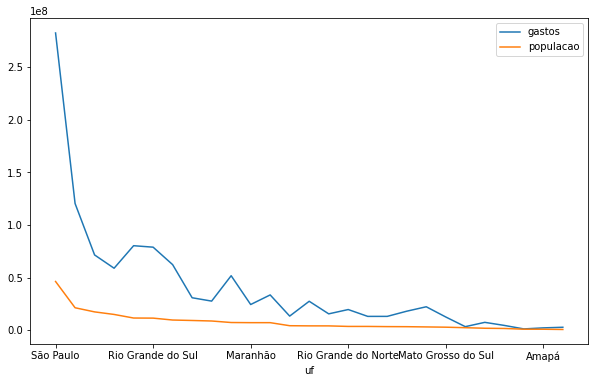

In [4]:
### Gráfico feio e horroroso, horripilante:
gastos_e_populacao_recente.loc[:,"gastos"] = gastos_e_populacao_recente.loc[:,"2020/Jul"] * 1000000
gastos_e_populacao_recente.loc[:,["gastos", "populacao"]].plot(figsize = (10, 6))

In [5]:
gastos_e_populacao_recente.loc[["Rio Grande do Sul", "São Paulo"]]

,populacao,2020/Jul,gastos
uf,,,
Rio Grande do Sul,11422973,78.93,78929703.81
São Paulo,46289333,282.71,282709570.31


In [6]:
gastos_e_populacao_recente.loc[:,"gasto_por_habitante"] = gastos_e_populacao_recente.loc[:,"gastos"] / gastos_e_populacao_recente.loc[:,"populacao"]
gastos_e_populacao_recente.loc[:,"gasto_por_habitante"]

uf
São Paulo             6.11
Minas Gerais          5.66
Rio de Janeiro        4.12
Bahia                 3.94
Paraná                6.97
Rio Grande do Sul     6.91
Pernambuco            6.48
Ceará                 3.35
Pará                  3.18
Santa Catarina        7.14
Maranhão              3.43
Goiás                 4.71
Amazonas              3.17
Espírito Santo        6.76
Paraíba               3.84
Rio Grande do Norte   5.54
Mato Grosso           3.71
Alagoas               3.91
Piauí                 5.49
Distrito Federal      7.28
Mato Grosso do Sul    4.45
Sergipe               1.43
Rondônia              4.12
Tocantins             2.82
Acre                  1.30
Amapá                 2.50
Roraima               4.34
Name: gasto_por_habitante, dtype: float64

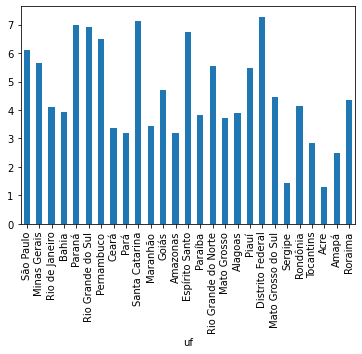

In [7]:
gastos_e_populacao_recente.loc[:,"gasto_por_habitante"].plot(kind = "bar")

## Desafio 01 - Ordenar o gráfico e criar uma visualização de gastos por habitante ordenada:

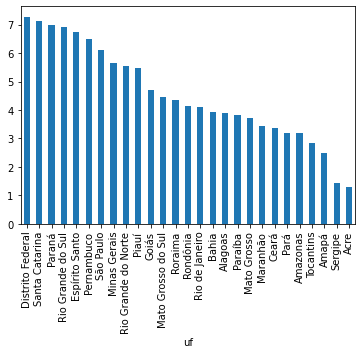

In [8]:
gastos_e_populacao_recente.sort_values(by = "gasto_por_habitante", ascending = False).loc[:,"gasto_por_habitante"].plot(kind = "bar")

**Em aula, o Gui sugeriu fazer o gráfico ordenado por população também, mas o gráfico que foi feito em aula já está ordenado dessa forma. Acredito que ele se confundiu e quis dizer ordenar por gasto absoluto, que seria o seguinte:**

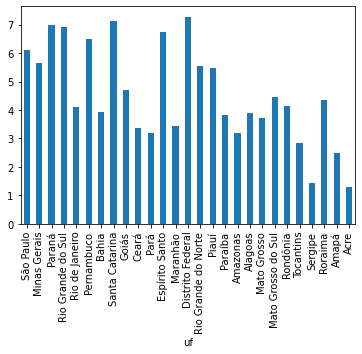

In [9]:
gastos_e_populacao_recente.sort_values(by = "gastos", ascending = False).loc[:,"gasto_por_habitante"].plot(kind = "bar")

In [10]:
import seaborn as sns

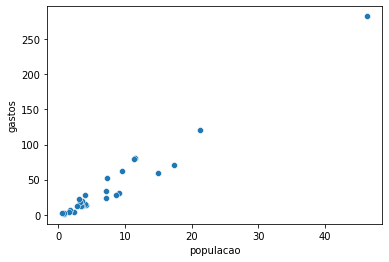

In [11]:
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos")

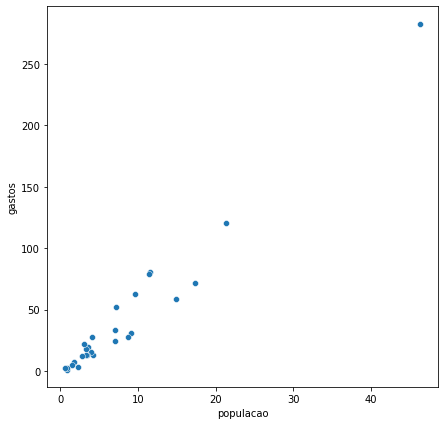

In [12]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos")

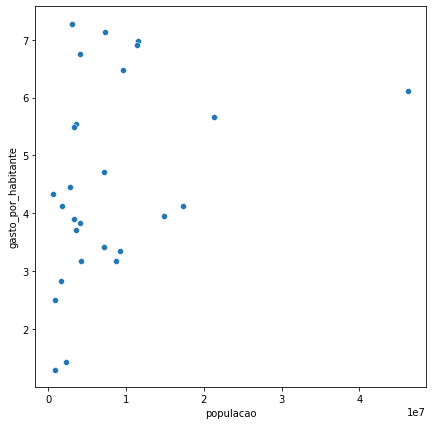

In [13]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante")

(0.0, 25000000.0)

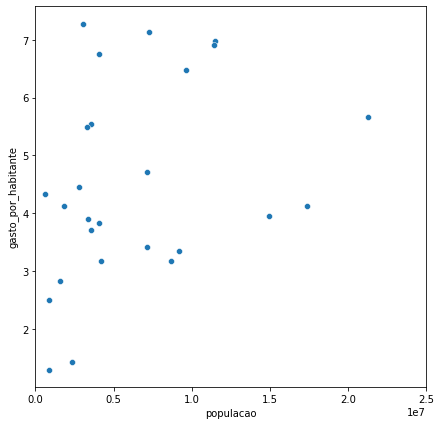

In [14]:
plt.figure(figsize = (7,7))
ax = sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante")
ax.set_xlim(0, 2.5e7)

## Desafio 02 - Fazer os mesmos gráficos do final da aula para meses anteriores, analisar compartilhar suas hipóteses

In [15]:
jun_20 = total_ord.loc[:,"2020/Jun"].copy()
jun_20 = limpeza(dados_populacao_raw, jun_20)
jun_20.loc[:,"gastos"] = jun_20.loc[:,"2020/Jun"] * 1000000
jun_20.loc[:,"gasto_por_habitante"] = jun_20.loc[:,"gastos"] / jun_20.loc[:,"populacao"]
jun_20

,populacao,2020/Jun,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,299.06,299060851.62,6.46
Minas Gerais,21292666,135.98,135977571.87,6.39
Rio de Janeiro,17366189,77.60,77604925.21,4.47
Bahia,14930634,65.16,65159300.63,4.36
Paraná,11516840,92.90,92901461.36,8.07
Rio Grande do Sul,11422973,89.02,89019478.82,7.79
Pernambuco,9616621,68.15,68145110.59,7.09
Ceará,9187103,42.15,42146555.81,4.59
Pará,8690745,35.40,35396030.78,4.07


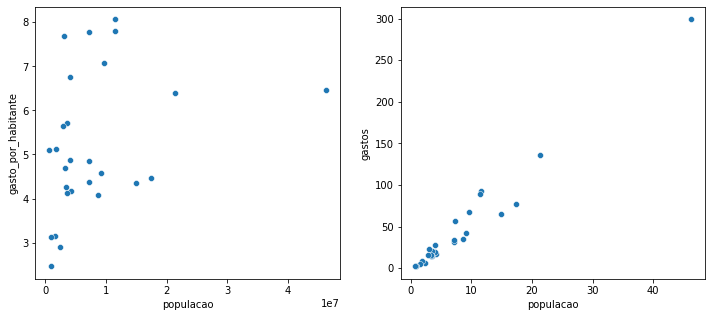

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

sns.scatterplot(data = jun_20, x = "populacao", y = "gasto_por_habitante", ax = ax[0])
sns.scatterplot(data = jun_20/1000000, x = "populacao", y = "gastos", ax = ax[1])

fig.show()

Somente batendo o olho no mês anterior, parece não haver diferença nenhuma entre os dois meses. Ambos os gráficos se comportam de maneira muito semelhante aos dois gráficos observados para Jul/2020. Claro, é um resultado esperado, o gasto de meses adjacentes a princípio é esperado que seja semelhante. Não houve nenhuma mudança drástica na situação sanitária de Junho para Julho de 2020. Vamos olhar para os dois juntos:

## Desafio 03 - Plotar no mesmo gráfico do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses

https://stackoverflow.com/questions/51732867/seaborn-plot-two-data-sets-on-the-same-scatter-plot/51733133

In [17]:
mes_comb = pd.concat([gastos_e_populacao_recente.assign(dataset = 'jul_20'), 
                      jun_20.assign(dataset = 'jun_20')])

mes_comb.head()

,populacao,2020/Jul,gastos,gasto_por_habitante,dataset,2020/Jun
uf,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,jul_20,nan
Minas Gerais,21292666,120.47,120467187.34,5.66,jul_20,nan
Rio de Janeiro,17366189,71.54,71540227.33,4.12,jul_20,nan
Bahia,14930634,58.90,58898100.40,3.94,jul_20,nan
Paraná,11516840,80.32,80320852.69,6.97,jul_20,nan


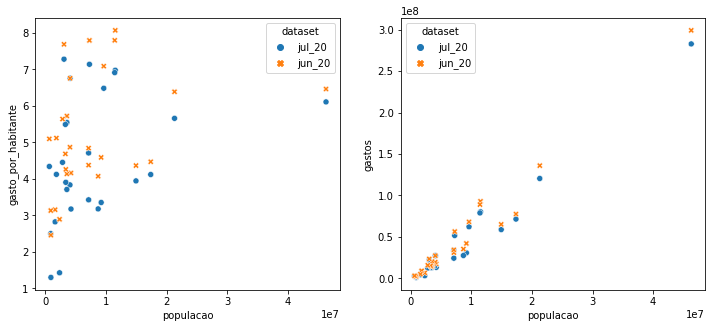

In [18]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

sns.scatterplot(x = 'populacao', y = 'gasto_por_habitante', 
                data = mes_comb,
                hue = 'dataset', style = 'dataset', ax = ax[0])

sns.scatterplot(x = 'populacao', y = 'gastos', 
                data = mes_comb,
                hue = 'dataset', style = 'dataset', ax = ax[1]) # atenção para o problema de escala
plt.show()

Parece que houve uma ligeira queda nos valores totais gastos entre Junho e Julho de 2020, mas n fatores podem estar associados, aqui estamos fazendo uma leitura bastante simples desses dados. Vimos que o mês de processamento não é uma boa medida para analisar os reais padrões de gastos...

Será que eu consegui resolver de um jeito parecido ou completamente diferente do que foi feito na próxima aula? Veremos!

### Resolução da aula

**A ideia do Gui foi criar uma função que automatiza esse processo de extrair um mês**

In [19]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str): 
  # mes: str define que o tipo de mes só pode ser string
  # pd.DataFrame para definir que só pode ser DataFrame
  gastos_do_mes = todos_os_gastos.loc[:,mes]
  dados.loc[:, f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados.loc[:, f"gasto_por_habitante_{mes}"] = dados.loc[:, f"gastos_{mes}"] / dados.loc[:, "populacao"]

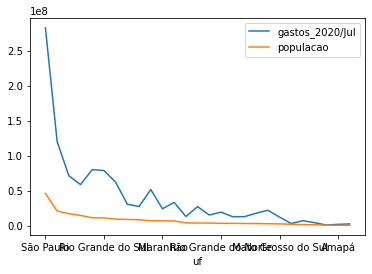

In [20]:
insere_gastos_e_gasto_por_habitante_para(total_ord, gastos_e_populacao_recente, "2020/Jul")
gastos_e_populacao_recente[["gastos_2020/Jul", "populacao"]].plot()

In [21]:
insere_gastos_e_gasto_por_habitante_para(total_ord, gastos_e_populacao_recente, "2020/Jun")
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gastos_2020/Jun,gasto_por_habitante_2020/Jun
uf,,,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,282709570.31,6.11,299060851.62,6.46
Minas Gerais,21292666,120.47,120467187.34,5.66,120467187.34,5.66,135977571.87,6.39
Rio de Janeiro,17366189,71.54,71540227.33,4.12,71540227.33,4.12,77604925.21,4.47
Bahia,14930634,58.90,58898100.40,3.94,58898100.40,3.94,65159300.63,4.36
Paraná,11516840,80.32,80320852.69,6.97,80320852.69,6.97,92901461.36,8.07


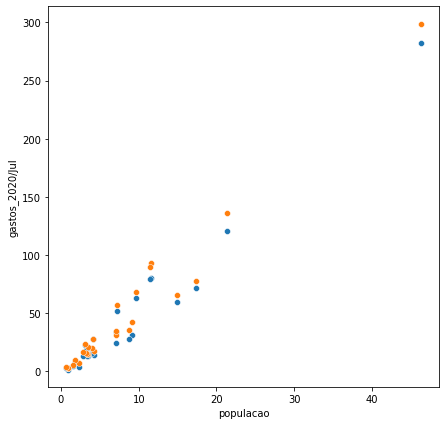

In [22]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos_2020/Jul")
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos_2020/Jun")

Adicionando Maio

In [23]:
insere_gastos_e_gasto_por_habitante_para(total_ord, gastos_e_populacao_recente, "2020/Mai")

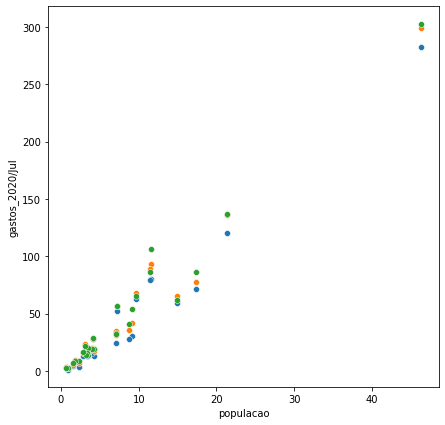

In [24]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos_2020/Jul")
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos_2020/Jun")
sns.scatterplot(data = gastos_e_populacao_recente/1000000, x = "populacao", y = "gastos_2020/Mai")

O Gui ressaltou em aula que é difícil assumir grandes conclusões a partir desses dados de meses muito recentes (da análise), pois o valor de processamento ainda tende a mudar e ficar mais completo conforme o tempo passa.

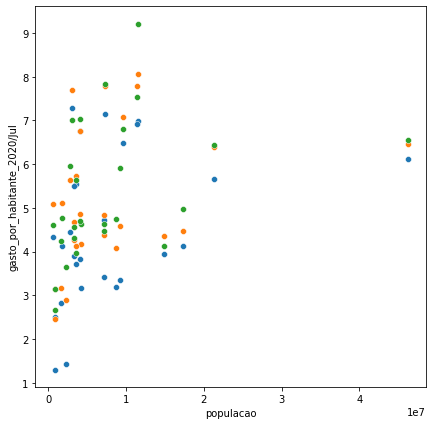

In [25]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante_2020/Jul")
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante_2020/Jun")
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante_2020/Mai")